1. Import and Install Dependencies

In [1]:
pip install tensorflow opencv-python mediapipe sklearn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2                           #computer vision for realtime imagine processing
import numpy as np                   #store the numpy array of data points
import os                            #interaction between user and operating system
from matplotlib import pyplot as plt #plotting the graph
import time                          #sleep between each frame
import mediapipe as mp               #extract keypoints saving as frames
from PIL import Image

2. Visualization of Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # pre-trained machine learning model that can detect and track multiple human body landmarks such as facial landmarks, hands, and body posture.
mp_drawing = mp.solutions.drawing_utils # user-friendly visualization of the detected landmarks.

In [4]:
#penCV uses BGR color as a default color space to display images
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  #Image is no longer writeable
    results = model.process(image)                 #Make prediction ie model takes images as non writable
    image.flags.writeable = True                   #Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
mp_drawing.draw_landmarks #function to draw landmarks on frames

<function mediapipe.python.solutions.drawing_utils.draw_landmarks(image: numpy.ndarray, landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList, connections: Optional[List[Tuple[int, int]]] = None, landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2), connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2))>

In [6]:
mp_holistic.POSE_CONNECTIONS #frozen set can't change the drawing on the face

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [7]:
def draw_styled_landmarks(image, results):

    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )
    
    # Draw pose line connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )

3. Display Model with keypoints using web camera

In [10]:
cap = cv2.VideoCapture(0) #accessing th web camera

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#min_detection_confidence is the minimum confidence score required for a detection
#min_tracking_confidence is the minimum confidence score required for a tracking
    while cap.isOpened(): #loop through the feed

        # Read feed from camera
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show screen to the user
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully from camera feed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release() #release the web camera
    cv2.destroyAllWindows() #close down the window

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
cap.release() #release the web camera just in case
cv2.destroyAllWindows() #close down the window

In [11]:
len(results.left_hand_landmarks.landmark) # number of landmark on lefthand

AttributeError: 'NoneType' object has no attribute 'landmark'

In [12]:
len(results.right_hand_landmarks.landmark) # number of landmark on righthand

21

In [13]:
len(results.pose_landmarks.landmark) #number of landmark for pose

33

In [14]:
frame.shape #last frame captured from the video

(480, 640, 3)

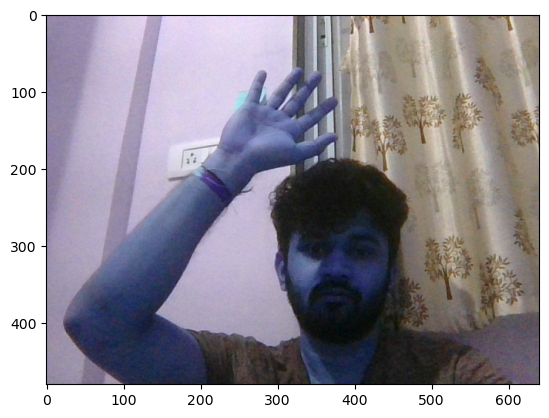

In [15]:
plt.imshow(frame) #open cv captures image in BGR

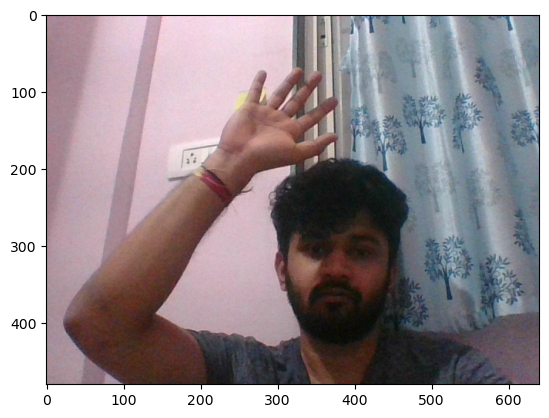

In [16]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)) #mediapipe require RGB format

4. Extract Keypoint Values from frames

In [8]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4) #flatten is used to covert to one array from list of array
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [17]:
extract_keypoints(results).shape #shape of extracted point is 258. 33*4 + 21*3 + 21*3

(258,)

5. Setting Folder for storing Numpy Array

In [18]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['done','hello','thankyou','yes'])

# fifty videos worth of data
no_sequences = 50

# Videos are going to be 50 frames in length
sequence_length = 50

In [19]:
#collect 50 frames per video and 50 vidoes per action.

for action in actions: 
    for sequence in range(1,no_sequences+1):
        #try except block is used to catch error if the folder already exists
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence))) #create folder data_path and sub folder
        except:
            pass

6. Collecting Keypoint for Training and Testing Model

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences ie each videos
        for sequence in range(1,no_sequences+1):
            # Loop through video length ie sequence length
            for frame_num in range(1,sequence_length+1):

                # Read feed through web cam
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # wait logic
                if frame_num == 1: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image) # Show to screen
                    cv2.waitKey(50) #wait logic between each video
                else: 
                
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(50)
                    
                # Export keypoints from each frames
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully from web camera
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [20]:
arr = np.load('10.npy')

In [21]:
img = Image.fromarray(arr)

In [22]:
img.show()

7. Preprocess Data and Create Labels and Features

In [23]:
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical

In [24]:
label_map = {label:num for num, label in enumerate(actions)} #labeling each actions

In [25]:
label_map

{'done': 0, 'hello': 1, 'thankyou': 2, 'yes': 3}

In [26]:
#sequences represent x label
#labels represent y label
sequences, labels = [], []
for action in actions:
    for sequence in range(1,no_sequences+1):
        window = []
        for frame_num in range(1,sequence_length+1):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res) #adding frame to the window
        sequences.append(window) #appending all the videos to squences label
        labels.append(label_map[action]) #labelling all the vidoes based on action

In [27]:
np.array(sequences).shape #(number of videos,frames,datapoints)

(200, 50, 258)

In [28]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [29]:
np.array(labels).shape #(number of videos,labels)

(200,)

In [30]:
X = np.array(sequences)

In [31]:
X.shape

(200, 50, 258)

In [32]:
y = to_categorical(labels).astype(int)

In [33]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0,

In [34]:
y.shape

(200, 4)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.1)

In [36]:
X_train.shape

(180, 50, 258)

In [37]:
X_test.shape

(20, 50, 258)

In [38]:
y_train.shape

(180, 4)

In [39]:
y_test.shape

(20, 4)

8. Build and Train LSTM Neural Network

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [41]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [42]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(50,258)))
model.add(Dropout(0.2))
#model.add(LSTM(32, return_sequences=True, activation='relu', input_shape=(50,258)))
#model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [43]:
actions.shape[0] #output labels

4

In [44]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [45]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
6/6 [==============================] - 5s 105ms/step - loss: 1.3788 - categorical_accuracy: 0.2944
Epoch 2/100
6/6 [==============================] - 1s 88ms/step - loss: 1.6169 - categorical_accuracy: 0.4778
Epoch 3/100
6/6 [==============================] - 1s 92ms/step - loss: 1.1560 - categorical_accuracy: 0.6722
Epoch 4/100
6/6 [==============================] - 1s 91ms/step - loss: 0.8203 - categorical_accuracy: 0.6333
Epoch 5/100
6/6 [==============================] - 1s 101ms/step - loss: 0.8544 - categorical_accuracy: 0.7389
Epoch 6/100
6/6 [==============================] - 1s 91ms/step - loss: 0.9291 - categorical_accuracy: 0.5278
Epoch 7/100
6/6 [==============================] - 1s 91ms/step - loss: 0.7739 - categorical_accuracy: 0.6278
Epoch 8/100
6/6 [==============================] - 1s 86ms/step - loss: 0.6935 - categorical_accuracy: 0.7500
Epoch 9/100
6/6 [==============================] - 1s 87ms/step - loss: 0.5193 - categorical_accuracy: 0.8333
Epoch 10

In [46]:
#tensorboard --logdir=. --bind_all
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            82688     
                                                                 
 dropout (Dropout)           (None, 50, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 128)           98816     
                                                                 
 dropout_1 (Dropout)         (None, 50, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

9. Making Prediction on Model

In [47]:
res = model.predict(X_test)

1/1 [==============================] - 0s 456ms/step


In [48]:
res #probability given by softmax

array([[1.2499227e-06, 4.3892521e-07, 9.9999833e-01, 6.6196804e-08],
       [1.3231171e-07, 2.6581699e-08, 9.9999988e-01, 4.8444155e-09],
       [4.0710036e-02, 7.0380145e-01, 1.2745267e-02, 2.4274318e-01],
       [3.3444319e-02, 4.7696298e-01, 7.4890605e-03, 4.8210365e-01],
       [8.7806351e-05, 1.0355910e-04, 9.9979514e-01, 1.3486850e-05],
       [3.4619231e-02, 2.9670522e-01, 1.3989306e-03, 6.6727662e-01],
       [8.0097507e-06, 5.7886004e-06, 9.9998558e-01, 6.7281530e-07],
       [4.7348782e-02, 6.8149078e-01, 1.1899303e-02, 2.5926116e-01],
       [3.9801002e-02, 6.7793888e-01, 1.0480869e-02, 2.7177927e-01],
       [4.0872239e-02, 6.5184563e-01, 8.1834020e-03, 2.9909879e-01],
       [3.1082712e-02, 2.7592659e-01, 1.3188833e-03, 6.9167185e-01],
       [4.8853817e-05, 6.9189380e-05, 9.9987566e-01, 6.2931440e-06],
       [3.2893591e-02, 2.8021547e-01, 1.3444299e-03, 6.8554646e-01],
       [3.3809360e-02, 3.2537121e-01, 1.4580688e-03, 6.3936132e-01],
       [5.8010384e-05, 7.9117672e-

In [49]:
actions[np.argmax(res[1])]

'thankyou'

In [50]:
actions[np.argmax(y_test[1])]

'thankyou'

In [51]:
model.save('samplephase3.h5')

In [ ]:
#del model

In [ ]:
#model.load_weights('sample.h5')

In [62]:
actions[np.argmax(res[2])]

'hello'

In [63]:
actions[np.argmax(y_test[2])]

'hello'

10. Evaluation using Confusion Matrix and Accuracy

In [64]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [65]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 46ms/step


In [66]:
ytrue = np.argmax(y_test, axis=1).tolist()

In [67]:
yhat = np.argmax(yhat, axis=1).tolist()

In [68]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[19,  0],
        [ 0,  1]],

       [[15,  0],
        [ 1,  4]],

       [[14,  0],
        [ 0,  6]],

       [[11,  1],
        [ 0,  8]]], dtype=int64)

In [69]:
accuracy_score(ytrue, yhat)

0.95

In [93]:
# 1. New detection variables
sequence = []
#sentence = []
#threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()


        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:50]
        
        if len(sequence) == 50:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            #print(actions[np.argmax(res)])

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

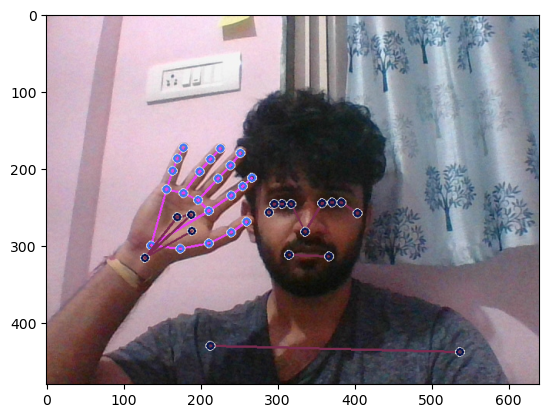

In [71]:
action1 = plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [72]:
prediction1 = actions[np.argmax(res)]

In [73]:
prediction1

'yes'

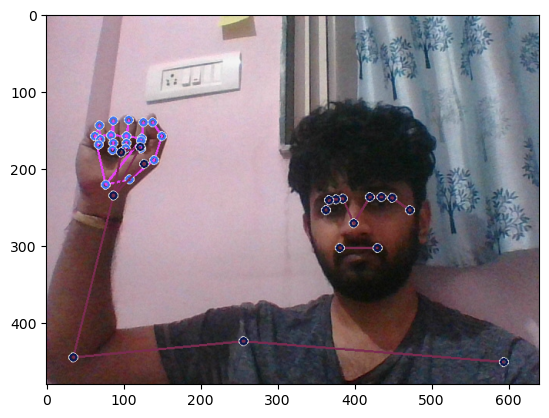

In [76]:
action2 = plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [77]:
prediction2 = actions[np.argmax(res)]

In [78]:
prediction2

'yes'

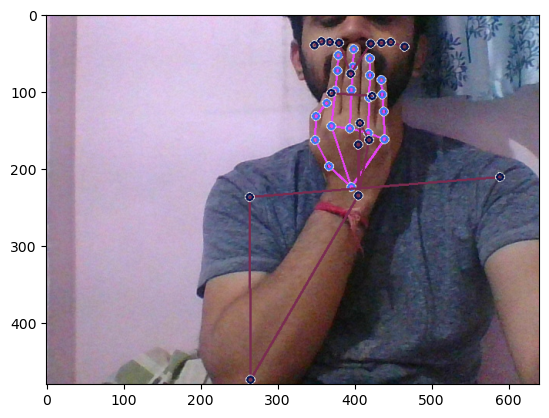

In [84]:
action3 = plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [85]:
prediction3 = actions[np.argmax(res)]

In [86]:
prediction3

'thankyou'

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

11. Flask Web Application

In [88]:
from flask import Flask, render_template, Response
from tensorflow import keras

In [89]:
app = Flask(__name__)

In [99]:
model = keras.models.load_model('samplephase3.h5')

In [104]:
@app.route('/')
def index():
    return render_template('index.html')

AssertionError: View function mapping is overwriting an existing endpoint function: index

In [103]:
# 1. New detection variables
sequence = []
#sentence = []
#threshold = 0.7

cap = cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:50]
        
        if len(sequence) == 50:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            #print(actions[np.argmax(res)])
            
        ret, buffer = cv2.imencode('.jpg', frame)
        frame = buffer.tobytes()

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 29ms/step


In [97]:
@app.route('/video_feed')
def video_feed():
    return Response(gen(), mimetype='multipart/x-mixed-replace; boundary=frame')

if __name__ == '__main__':
    app.run(debug=True)


AssertionError: View function mapping is overwriting an existing endpoint function: video_feed

In [98]:
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1